In [1]:
import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh

In [2]:
#讀資料
df_amazon_cells_labelled = pd.read_csv('amazon_cells_labelled.txt',sep="\t"or"\n",header=None)
df_imdb_labelled = pd.read_csv('imdb_labelled.txt',sep="\t"or"\n",header=None)
df_yelp_labelled = pd.read_csv('yelp_labelled.txt',sep="\t"or"\n",header=None)

#合併
df = pd.concat([df_amazon_cells_labelled,df_imdb_labelled,df_yelp_labelled],ignore_index = True)

# check missing value

In [3]:
df.isnull()

,0,1
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2743,False,False
2744,False,False
2745,False,False
2746,False,False


In [4]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

0    (The amoung of missing records is: , 0)
1    (The amoung of missing records is: , 0)
dtype: object

In [5]:
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2743    (The amoung of missing records is: , 0)
2744    (The amoung of missing records is: , 0)
2745    (The amoung of missing records is: , 0)
2746    (The amoung of missing records is: , 0)
2747    (The amoung of missing records is: , 0)
Length: 2748, dtype: object

# check duplicated data

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [7]:
sum(df.duplicated())

17

In [8]:
sum(df.duplicated(0))

17

In [9]:
df.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [10]:
#確認是否還有重複值
sum(df.duplicated())

0

In [11]:
#刪掉重複值後，剩下的數量
len(df)

2714

# data sampling

In [12]:
df_sample = df.sample(n=500) #random state

In [13]:
len(df_sample)

500

In [14]:
df_sample[0:4]

,0,1
1642,This was one of the worst films i have ever se...,0
833,"My father has the V265, and the battery is dying.",0
822,I have been very satisfied with this cell phon...,1
2657,This is my new fav Vegas buffet spot.,1


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

1    1366
0    1348
Name: 1, dtype: int64


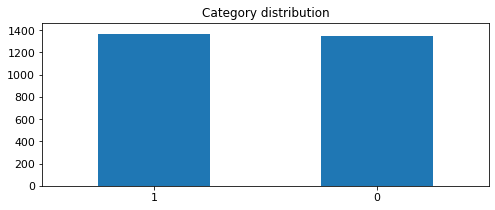

In [16]:
print(df[1].value_counts())

upper_bound = max(df[1].value_counts()) + 100
# plot barchart for X_sample
df[1].value_counts().plot(kind = 'bar',
                          title = 'Category distribution',
                          ylim = [0, upper_bound],        
                          rot = 0, fontsize = 11, figsize = (8,3))

1    276
0    224
Name: 1, dtype: int64


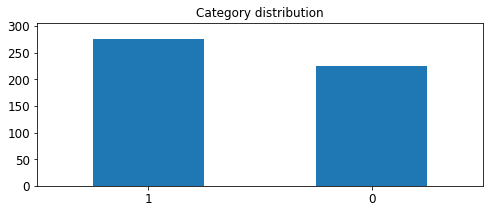

In [17]:
print(df_sample[1].value_counts())

upper_bound = max(df_sample[1].value_counts()) + 30
# plot barchart for X_sample
df_sample[1].value_counts().plot(kind = 'bar',
                                 title = 'Category distribution',
                                 ylim = [0, upper_bound], 
                                 rot = 0, fontsize = 12, figsize = (8,3))

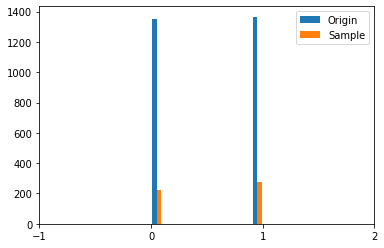

In [18]:
p1 = df[1]
p2 = df_sample[1]                               

plt.hist([p1, p2], label = ['Origin','Sample'])
plt.xticks([-1,0,1,2])
plt.legend(loc='upper right')

In [19]:
import nltk

In [20]:
#切割句子
df['unigrams'] = df[0].apply(lambda x: dmh.tokenize_text(x))

In [21]:
df[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [22]:
df[0:4]

,0,1,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."


In [23]:
list(df[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df[0])

In [25]:
# We can check the shape of this matrix by:
df_counts.shape

(2714, 5153)

In [26]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [28]:
# we convert from sparse array to normal array
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [29]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [30]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [31]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

In [32]:
plot_z = df_counts[0:20, 0:20].toarray()

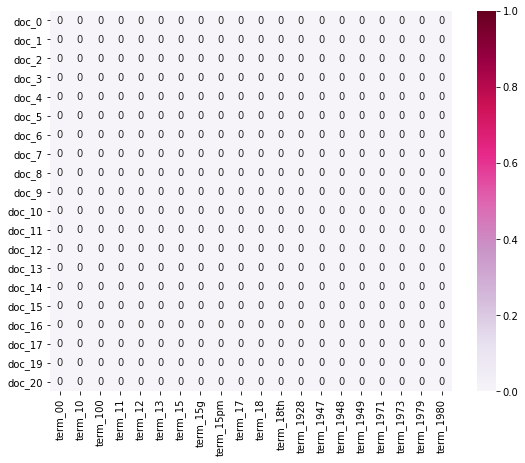

In [33]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [34]:
plot_u = ["term_"+str(i) for i in count_vect.get_feature_names()[:]]
plot_v = ["doc_"+ str(i) for i in list(df.index)[:]]
plot_w = df_counts[:, :].toarray()

In [35]:
#計算每個doc裡面各包含多少term
terms_in_doc = [] 
for i in range(len(plot_v)):
    n = 0
    for j in range(len(plot_u)):
        n += plot_w[i][j]
    terms_in_doc.append(n)

In [36]:
#計算每個term各出現在多少個doc裡
docs_contain_term = []
for j in range(len(plot_u)):
    m = 0
    for i in range(len(plot_v)):
        m += plot_w[i][j]
    docs_contain_term.append(m)

In [37]:
#依數量做排序，找出有最多term的doc以及分布在最多doc數量的term
terms_in_doc_ver2 = list(enumerate(terms_in_doc))
docs_contain_term_ver2 = list(enumerate(docs_contain_term))

sorted_terms_in_doc = sorted(terms_in_doc_ver2, key = lambda l:l[1], reverse=True)
sorted_docs_contain_term = sorted(docs_contain_term_ver2, key = lambda l:l[1], reverse=True)

In [38]:
new_plot_u = ["term_"+str(count_vect.get_feature_names()[i]) for i,j in sorted_docs_contain_term[:30]]
new_plot_v = ["doc_"+str(i) for i,j in sorted_terms_in_doc[:30]]

In [39]:
#根據排序結果做出新的順序，讓熱源圖顯示的部分是資料較多的交集處
new_plot_w = plot_w[0:30,0:30]
for i in range(30):
    m = sorted_terms_in_doc[i][0]
    for j in range(30):
        n = sorted_docs_contain_term[j][0]
        new_plot_w[i][j] = df_counts[m,n]

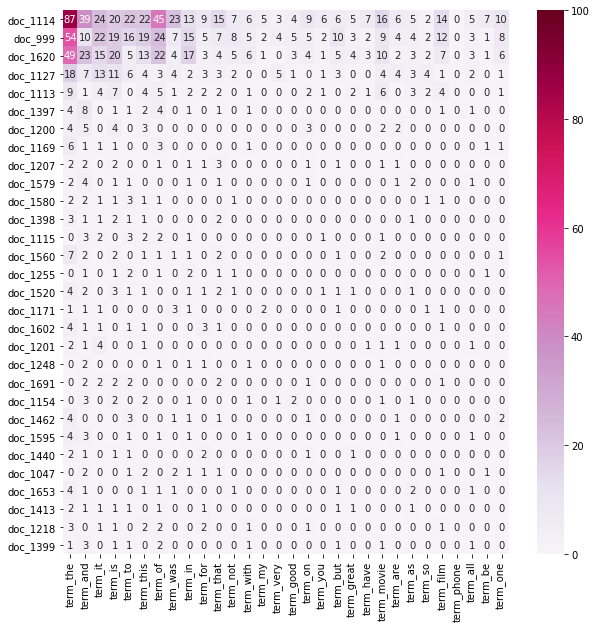

In [40]:
df_todraw = pd.DataFrame(new_plot_w, columns = new_plot_u, index = new_plot_v)
plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=100, annot=True);

In [41]:
from sklearn.decomposition import PCA

In [42]:
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())

In [43]:
df_reduced.shape

(2714, 2)

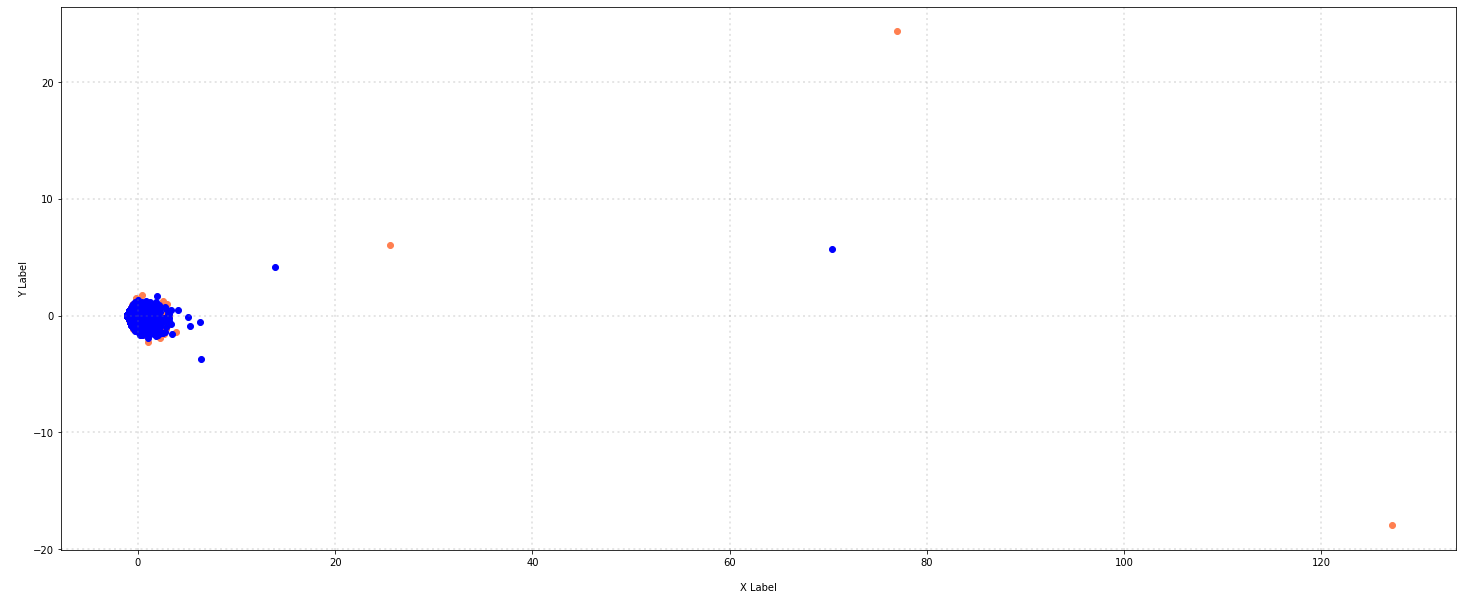

In [44]:
col = ['coral', 'blue']
categories = [0,1]

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = df_reduced[df[1]==category].T[0]
    ys = df_reduced[df[1]==category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

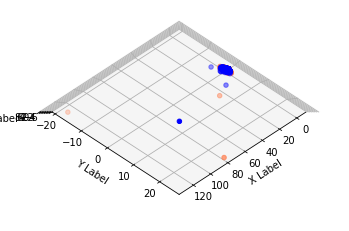

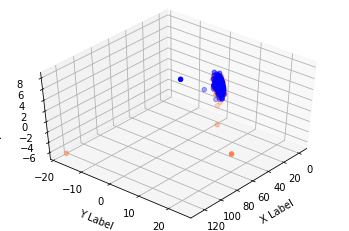

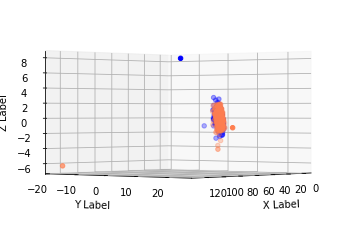

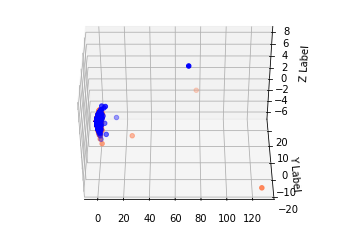

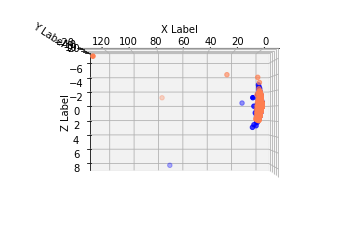

In [45]:
# Answer here
from mpl_toolkits.mplot3d import axes3d

df_reduced_to_3 = PCA(n_components = 3).fit_transform(df_counts.toarray())

col = ['coral', 'blue']

def plot_with_diff_angle(angle_y,angle_z):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    for c, category in zip(col, categories):
        xs = df_reduced_to_3[df[1] == category].T[0]
        ys = df_reduced_to_3[df[1] == category].T[1]
        zs = df_reduced_to_3[df[1] == category].T[2]
    
        ax.scatter(xs, ys, zs, c = c, marker='o')

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    ax.view_init(elev=angle_y,azim=angle_z)
    plt.show()

plot_with_diff_angle(90,40)
plot_with_diff_angle(45,40)
plot_with_diff_angle(0,40)
plot_with_diff_angle(40,270)
plot_with_diff_angle(180,90)


# 可以發現不管從甚麼角度看，都會有一大群資料聚集在同一塊區域，然後會有少數分散四處的離群值。

# 計算term frequencies

In [46]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [47]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [48]:
term_frequencies[0]

1

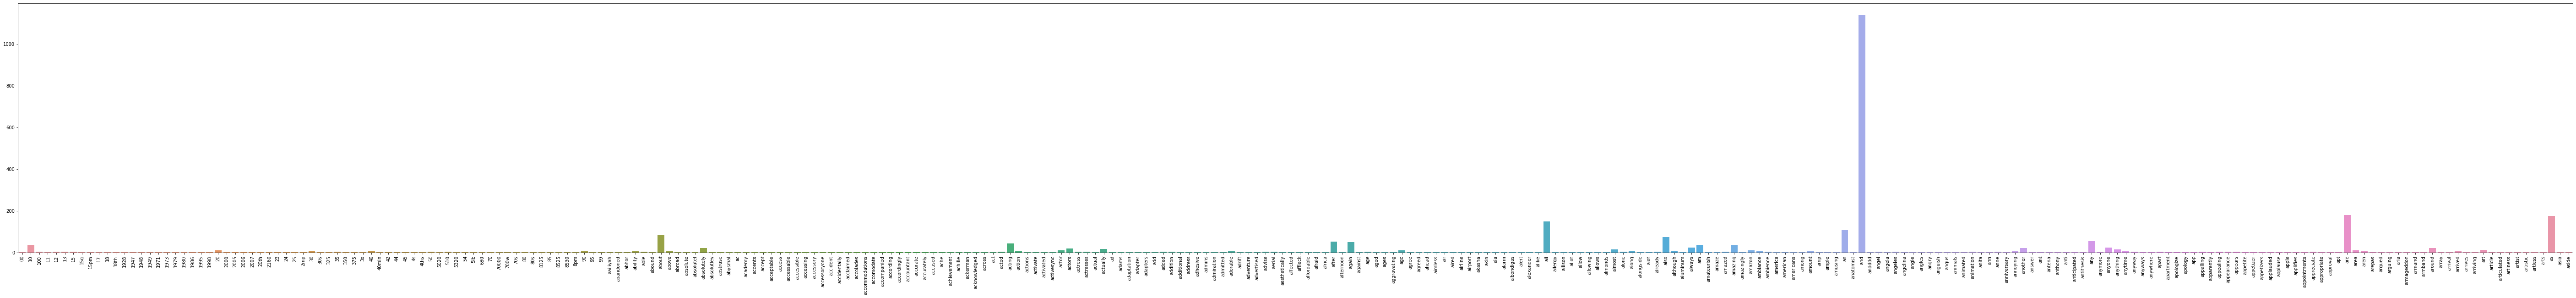

In [50]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

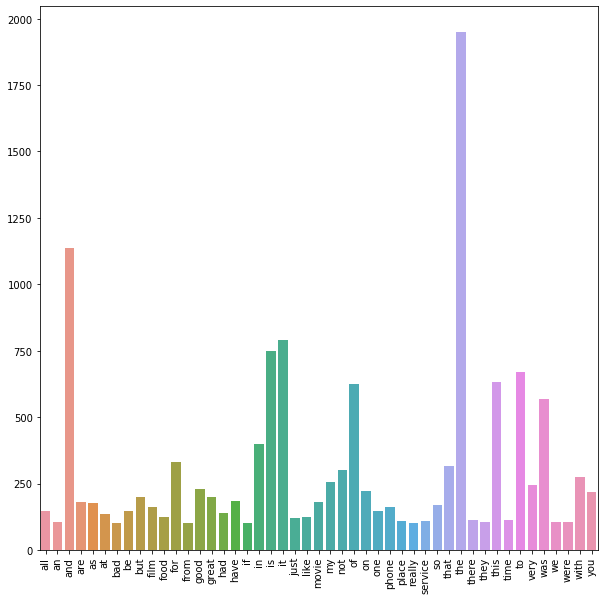

In [52]:
#只列出頻率大於100的term
list_of_term_frequencies = [term_frequencies[i] for i in range(len(term_frequencies))]
list2_of_term_frequencies = list(enumerate(list_of_term_frequencies))
list3_of_term_frequencies = [list2_of_term_frequencies[i] for i in range(len(term_frequencies))
                                                             if list2_of_term_frequencies[i][1] > 100]

list_of_feature_names = [count_vect.get_feature_names()[i] for i,j in list3_of_term_frequencies[:]]
list_of_frequencies = [j for i,j in list3_of_term_frequencies[:]]

plt.subplots(figsize=(10, 10))
g = sns.barplot(x=list_of_feature_names, 
            y=list_of_frequencies)
g.set_xticklabels(list_of_feature_names, rotation = 90);



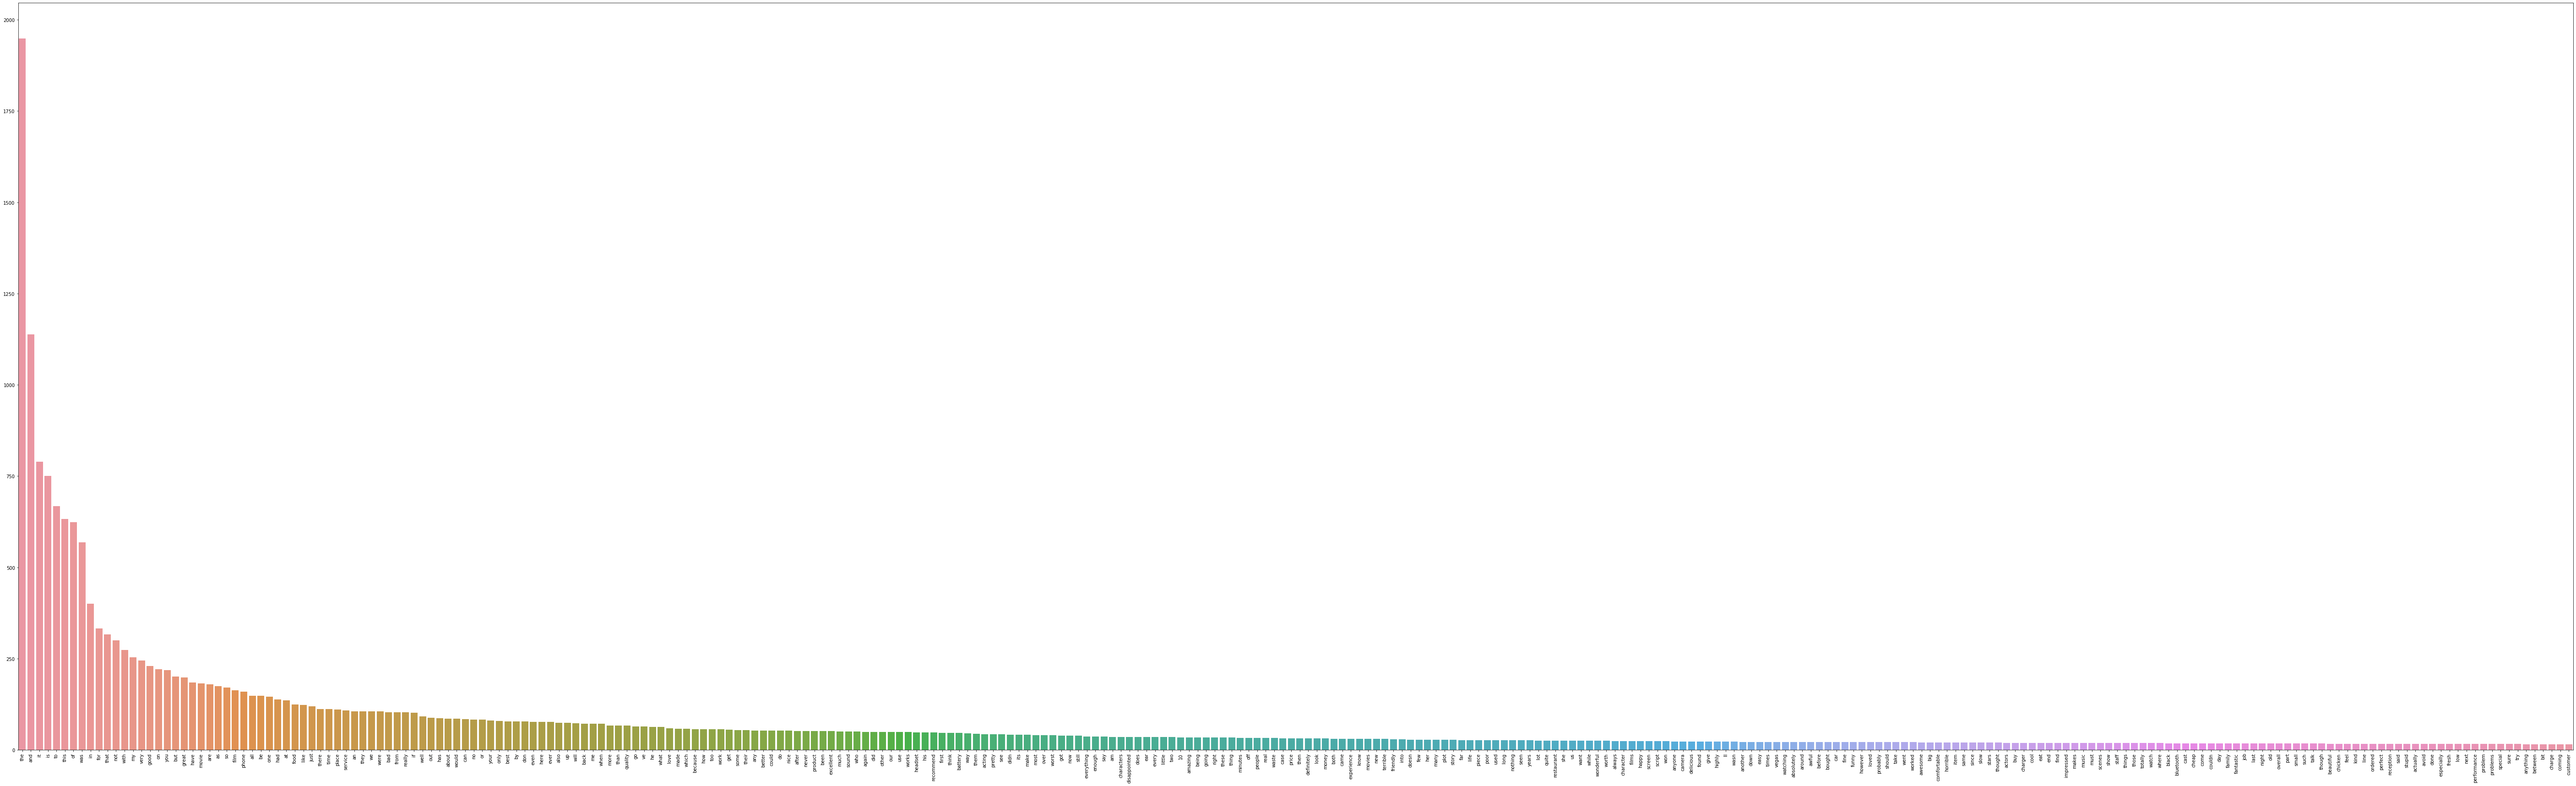

In [54]:
#將term根據出現頻率排列，可以發現出現長尾圖
list_of_term_frequencies = [term_frequencies[i] for i in range(len(term_frequencies))]
list2_of_term_frequencies = list(enumerate(list_of_term_frequencies))
list3_of_term_frequencies = sorted(list2_of_term_frequencies, key = lambda l : l[1], reverse=True)

list_of_feature_names = [count_vect.get_feature_names()[i] for i,j in list3_of_term_frequencies[:300]]
list_of_frequencies = [j for i,j in list3_of_term_frequencies[:300]]

plt.subplots(figsize=(100, 30))
g = sns.barplot(x=list_of_feature_names, 
                y=list_of_frequencies)
g.set_xticklabels(list_of_feature_names, rotation = 90);


In [55]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

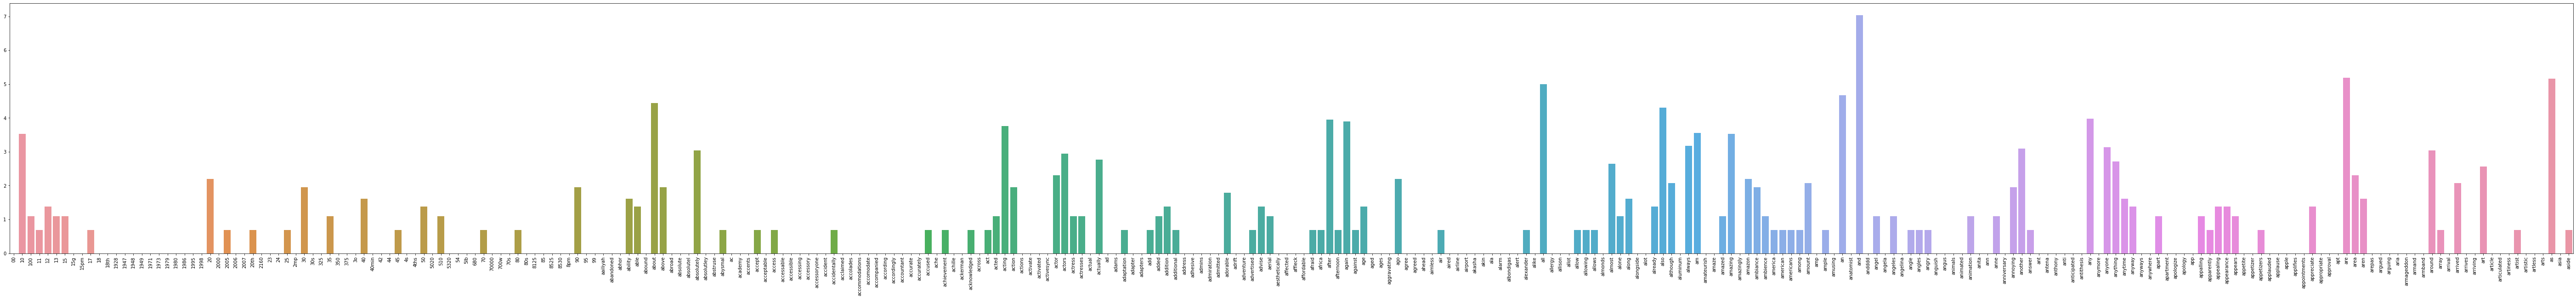

In [57]:
#對頻率取log，讓資料更可視
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

# Data Exploration

In [58]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [59]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1[0]
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2[0]
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3[0]
document_to_transform_3.append(random_record_3)

In [60]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [61]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [62]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# 文字雲

In [63]:
from wordcloud import WordCloud

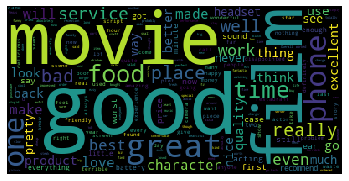

In [64]:
#用整個文字檔產生文字雲
text = ' '.join([i for i in df[0]])
cloud = WordCloud().generate(text)
plt.imshow(cloud)
plt.axis("off")
plt.show()

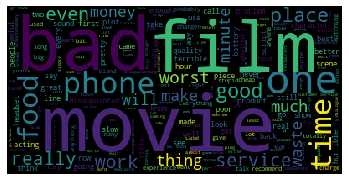

In [76]:
#用label為0的句子產生文字雲
text = ' '.join([df[0][i] for i in df.index if df[1][i]==0])
cloud = WordCloud().generate(text)
plt.imshow(cloud)
plt.axis("off")
plt.show()

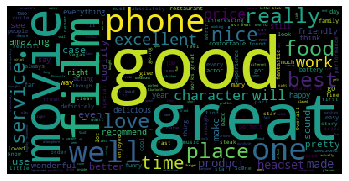

In [77]:
#用label為1的句子產生文字雲
text = ' '.join([df[0][i] for i in df.index if df[1][i]==1])
cloud = WordCloud().generate(text)
plt.imshow(cloud)
plt.axis("off")
plt.show()

# tfidf

In [78]:
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [79]:
vectorizer = TfidfVectorizer(smooth_idf=True)
tfidf = vectorizer.fit_transform([i for i in df[0]])
df_tfidf = pd.DataFrame(tfidf.toarray(),columns=vectorizer.get_feature_names())
df_tfidf

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
#上面輸出的表格，能看見的部分都是0，但是內部其實是有值的
df_tfidf['the']

0       0.087934
1       0.000000
2       0.198103
3       0.000000
4       0.207371
          ...   
2709    0.000000
2710    0.000000
2711    0.000000
2712    0.086994
2713    0.193943
Name: the, Length: 2714, dtype: float64

# Naive Bayes classifier

In [81]:
#計算各document的分數

#以tfidf的分數加總
TF_IDF = [sum(df_tfidf.iloc[i]) for i in range(len(df_tfidf))]

#以word frequency加總
word_frequency = [sum(i) for i in df_counts.toarray()]

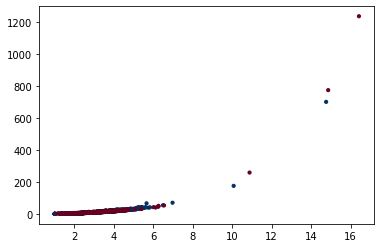

In [82]:
y = [i for i in df[1]] 
plt.scatter(TF_IDF,word_frequency, c=y, s=10, cmap='RdBu');

可以看到不論是用word frequency還是tfidf來打分數，它們之間的關係是差不多的。

In [107]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X = [[TF_IDF[i],word_frequency[i]] for i in range(len(TF_IDF))]
y = [i for i in df[1]] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (len(X_test), (y_test != y_pred).sum()))

Number of mislabeled points out of a total 1357 points : 671


錯誤率有點高

## . References

- Pandas cook book ([Recommended for starters](http://pandas.pydata.org/pandas-docs/stable/cookbook.html))
- [Pang-Ning Tan, Michael Steinbach, Vipin Kumar, Introduction to Data Mining, Addison Wesley](https://dl.acm.org/citation.cfm?id=1095618)
- https://clay-atlas.com/blog/2020/08/01/nlp-%E6%96%87%E5%AD%97%E6%8E%A2%E5%8B%98%E4%B8%AD%E7%9A%84-tf-idf-%E6%8A%80%E8%A1%93/
- https://ithelp.ithome.com.tw/articles/10205582
- https://leemeng.tw/practical-pandas-tutorial-for-aspiring-data-scientists.html
- https://scikit-learn.org/stable/modules/naive_bayes.html